In [1]:
using Statistics, Lux, MLUtils, OneHotArrays, MLDatasets, Plots
using Base: @kwdef
using Random: Xoshiro

In [2]:
using Pkg

In [ ]:
[values[:,:,b,t] * scores[1,1,t,:,:]' for b in axes(v_u, 3) t in axes(v_u,4)]

In [6]:
function attend(q::SpikeTrain, k::SpikeTrain, v::SpikeTrain; tspan::Tuple{<:Real, <:Real}=(0.0, 10.0), spk_args::SpikingArgs=default_spk_args(), return_solution::Bool = false)
    #compute the similarity between the spike trains
    #produces [q k][1 1 time]
    scores = similarity_outer(q, k, 2)
    #convert the values to potentials
    values = phase_memory(v, tspan=tspan, spk_args=spk_args)
    #multiply by the scores found at each time step
    output_u = stack([values[:,:,b,t] * scores[1,1,t,:,:]' for b in axes(v_u, 3), t in axes(v_u,4)])
    if return_solution 
        return output_u 
    end
    output = find_spikes_rf(output_u, values.t, spk_args)
    return output
end

attend (generic function with 2 methods)

In [7]:
include("src/network.jl")

variance_scaling (generic function with 1 method)

In [8]:

include("src/vsa.jl")
include("src/spiking.jl")

zero_nans (generic function with 1 method)

In [9]:
#dim_vsa, time samples, batch

In [10]:
q = random_symbols((512, 32, 1))
k = random_symbols((512, 20, 1))
v = random_symbols((512, 20, 1));

In [11]:
sa = SpikingArgs()

Neuron parameters: Period 1.0 (s)
Current kernel duration: 0.01 (s)
Threshold: 0.02 (V)


In [12]:
tspan = (0.0, 10.0)

(0.0, 10.0)

In [13]:
to_spk = x -> phase_to_train(x, sa, repeats = 10)

#335 (generic function with 1 method)

In [14]:
qst = to_spk(q)

Spike Train: (512, 32, 1) with 163840 spikes.

In [15]:
ss = similarity(qst, qst, spk_args = sa);

In [16]:
ss |> size

(1, 32, 1, 1001)

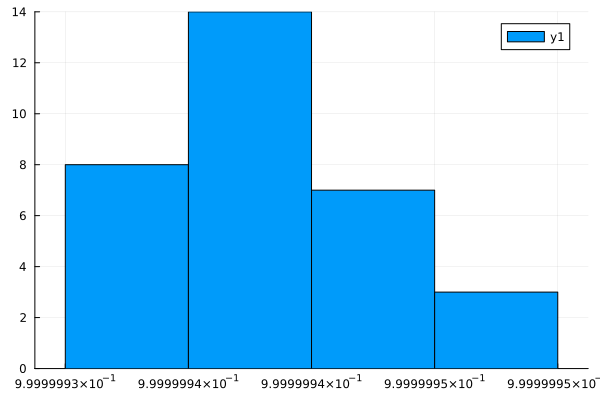

In [17]:
histogram( ss[:,:,:,end] |> vec)

In [18]:
qst.shape

(512, 32, 1)

In [19]:
kst = to_spk(k)
vst = to_spk(v)

Spike Train: (512, 20, 1) with 102400 spikes.

In [20]:
simo = similarity_outer(qst, kst, 2);

In [21]:
simo |> size

(1, 1, 1001, 32, 20)

In [22]:
simr = permutedims(simo[1,1,:,:,:], (2,3,1));

In [23]:
simr |> size

(32, 20, 1001)

In [24]:
so = similarity_outer(q, k, 2);

In [25]:
so |> size

(1, 1, 32, 20)

In [26]:
err = vec(so[1,1,:,:]) .- vec(simr[:,:,end]);

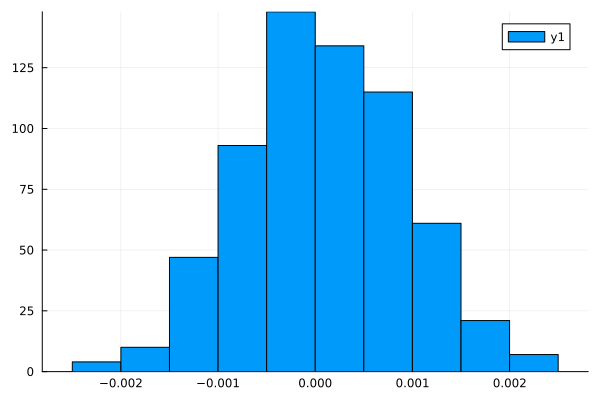

In [27]:
histogram(err)

In [29]:
v_u = phase_memory(vst, tspan=tspan, spk_args=sa);

In [30]:
v_u |> size

(512, 20, 1, 1001)

In [31]:
simo |> size

(1, 1, 1001, 32, 20)

In [32]:
axes(v_u,3)

Base.OneTo(1)

In [33]:
o = [v_u[:,:,b,t] * simo[1,1,t,:,:]' for b in axes(v_u, 3), t in axes(v_u,4)]

1×1001 Matrix{Matrix{ComplexF64}}:
 [0.0+0.0im 0.0+0.0im … 0.0+0.0im 0.0+0.0im; 0.0+0.0im 0.0+0.0im … 0.0+0.0im 0.0+0.0im; … ; 0.0+0.0im 0.0+0.0im … 0.0+0.0im 0.0+0.0im; 0.0+0.0im 0.0+0.0im … 0.0+0.0im 0.0+0.0im]  …  [-0.000130837-0.0165612im 0.0146483+0.00125497im … 0.0154113-0.00464968im 0.00964829-0.00432866im; -0.0152255-0.0164274im 0.00553721-0.0221747im … -0.0154766+0.000576056im -0.0087137-0.00850059im; … ; 0.0055953+0.013089im -0.00425469-0.0101635im … 0.00403363-0.00739534im 0.00465625-0.00700475im; 0.00827668-0.000603382im -0.0100034+0.00429358im … 0.00640074-0.00720274im 0.00546598-0.0183628im]

In [34]:
os = stack(o)

512×32×1×1001 Array{ComplexF64, 4}:
[:, :, 1, 1] =
 0.0+0.0im  0.0+0.0im  0.0+0.0im  …  0.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im     0.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im     0.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im     0.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im     0.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im  …  0.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im     0.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im     0.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im     0.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im     0.0+0.0im  0.0+0.0im  0.0+0.0im
    ⋮                             ⋱                ⋮       
 0.0+0.0im  0.0+0.0im  0.0+0.0im     0.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im     0.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im  …  0.0+0.0im  0.0+0.0im  0.

In [35]:
os |> size

(512, 32, 1, 1001)

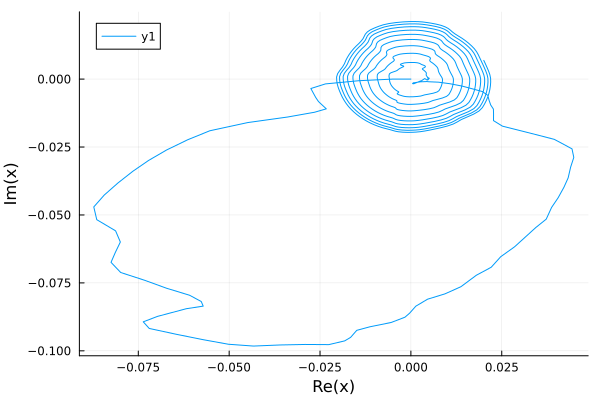

In [36]:
plot(os[1,3,1,:])

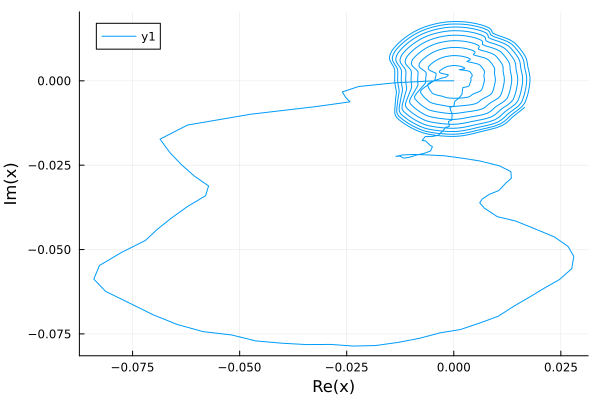

In [37]:
plot(os[5,3,1,:])

In [48]:
v_u |> size

(512, 20, 1, 1001)

In [38]:
[v_u[i,:,:] * simo]

UndefVarError: UndefVarError: `i` not defined

In [39]:
simo[1,1]

BoundsError: BoundsError: attempt to access 1×1×1001×32×20 Array{Float64, 5} at index [1, 1]

In [40]:
ints2 = similarity_outer(qst, kst, 2);

In [41]:
so_s = [i[1,1,end] for i in ints]

UndefVarError: UndefVarError: `ints` not defined

In [42]:
so_s2 = [i[1,1,end] for i in ints2]

1×1×1001×32×20 Array{Float64, 5}:
[:, :, 1, 1, 1] =
 -1.0

[:, :, 2, 1, 1] =
 -0.9755859375

[:, :, 3, 1, 1] =
 -0.9599626530408703

;;; … 

[:, :, 999, 1, 1] =
 0.02172391508378075

[:, :, 1000, 1, 1] =
 0.0216891279847076

[:, :, 1001, 1, 1] =
 0.021694854662447298

[:, :, 1, 2, 1] =
 -1.0

[:, :, 2, 2, 1] =
 -0.9638681527562112

[:, :, 3, 2, 1] =
 -0.952148866711571

;;; … 

[:, :, 999, 2, 1] =
 0.008089200397704513

[:, :, 1000, 2, 1] =
 0.008101762255048713

[:, :, 1001, 2, 1] =
 0.008104310164494057

[:, :, 1, 3, 1] =
 -1.0

[:, :, 2, 3, 1] =
 -0.9599609375

[:, :, 3, 3, 1] =
 -0.9550785567726058

;;; … 

[:, :, 999, 3, 1] =
 0.015550212286499714

[:, :, 1000, 3, 1] =
 0.015546850902007272

[:, :, 1001, 3, 1] =
 0.015543775469865056

;;;; … 

[:, :, 1, 30, 1] =
 -1.0

[:, :, 2, 30, 1] =
 -0.9589853402562112

[:, :, 3, 30, 1] =
 -0.9482439047868956

;;; … 

[:, :, 999, 30, 1] =
 -0.058906734620849464

[:, :, 1000, 30, 1] =
 -0.05892712345995836

[:, :, 1001, 30, 1] =
 -0.058937516

In [43]:
so = similarity_outer(q, k, 2);

In [44]:
err = vec(so_s) .- vec(so);

UndefVarError: UndefVarError: `so_s` not defined

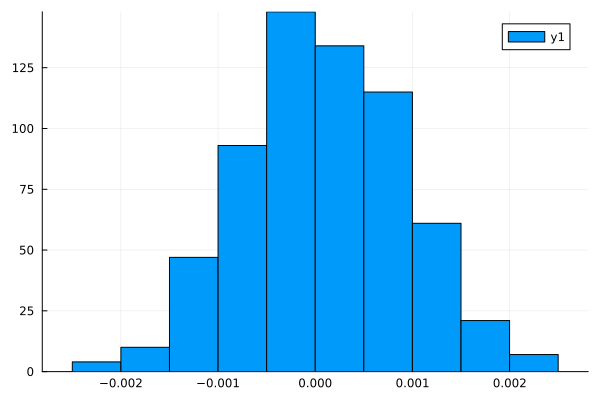

In [45]:
histogram(err)

In [52]:
o = attend(q, k, v)

512×32×1 Array{Float64, 3}:
[:, :, 1] =
  0.834852    0.397759    0.233063    …  -0.471151  -0.939222   -0.40451
 -0.489847   -0.76314     0.113605        0.417835  -0.797217    0.326966
  0.937242    0.943913   -0.877202       -0.695128  -0.714341   -0.23734
 -0.822559    0.488697   -0.113007       -0.765705   0.321536   -0.651625
  0.484534    0.931186   -0.107163        0.385503   0.628485    0.954808
  0.71309    -0.400636   -0.264031    …   0.882529   0.735122    0.124775
 -0.0232269   0.587705    0.385779        0.562253  -0.567379    0.313513
 -0.617799   -0.534114    0.468524       -0.947469   0.723584   -0.517597
 -0.455814    0.714158    0.616687       -0.834658   0.475367   -0.185771
 -0.841172    0.815509    0.00724711     -0.430327  -0.0277655  -0.730305
  ⋮                                   ⋱              ⋮          
 -0.606659    0.760625   -0.0510966      -0.151904  -0.992813   -0.065181
 -0.822327    0.399425    0.062288       -0.551584  -0.363051   -0.944688
  0.55796

In [53]:
using Zygote

In [54]:
loss = x -> 1.0 - sum(attend(x, k, v))

#193 (generic function with 1 method)

In [55]:
loss(q)

99.43187813667191

In [57]:
val, grads = Zygote.withgradient(loss, q)

(val = 99.43187813667191, grad = ([2.6733044560412127 -1.0946112601764617 … -0.3910048589469506 -0.4081670600493493; 1.926724547124937 1.29734993999807 … 0.2427180666656027 -0.5950517202469824; … ; -1.151641889969519 -0.8146418365429171 … 1.9549867243290986 1.401839552850427; 0.29311913111776394 0.8199642487496458 … 0.8603572796569925 -0.9989658628764937;;;],))